# Statistics Assignment-2 (CIs & Hypothesis)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

# CONFIDENCE INTERVALS

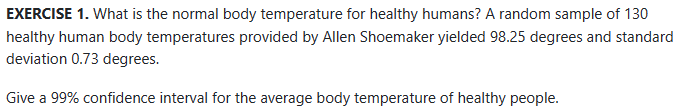

In [18]:
n1 = 130
xbar1 = 98.25
sigma1 = 0.73

In [19]:
sem1 = sigma1 / np.sqrt(n1)
sem1

0.06402523540941313

In [20]:
moe1 = 2.576 * sem1
moe1

0.16492900641464822

In [21]:
lower_limit1 = xbar1 - moe1
upper_limit2 = xbar1 + moe1
print (f"CI: lower_limit: {lower_limit1}, upper_limit: {upper_limit2}")

CI: lower_limit: 98.08507099358535, upper_limit: 98.41492900641465


In [22]:
#solution 2:
stats.norm.interval(0.99, loc = xbar1, scale = sem1)

(98.08508192246582, 98.41491807753418)

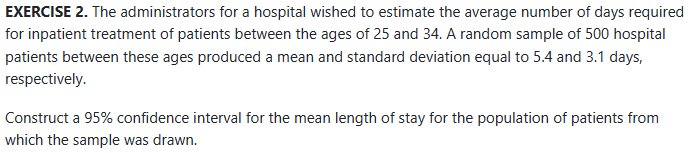

In [23]:
n2 = 500
xbar2 = 5.4
sigma2 = 3.1

In [25]:
sem2 = sigma2 / np.sqrt(n2)
sem2

0.13863621460498696

In [26]:
moe2 = 1.96 * sem2

In [27]:
lower_limit2 = xbar2 - moe2
upper_limit2 = xbar2 + moe2
print (f"CI: lower_limit: {lower_limit2}, upper_limit: {upper_limit2}")

CI: lower_limit: 5.128273019374226, upper_limit: 5.671726980625775


# HYPOTHESIS TESTING

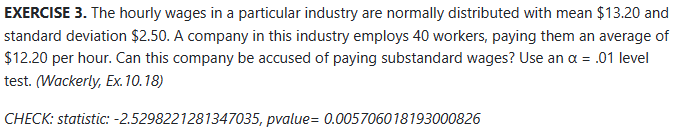

CHECK: statistic: -2.5298221281347035, pvalue= 0.005706018193000826

In [28]:
# H0: mean(mu) = 13.20  (standart)
# H1: mean(mu) < 13.20  (substandart) 

n3 = 40
mu3 = 13.20
s3 = 2.50
xbar3 = 12.20

z_score = (mu3 - xbar3) / (s3/np.sqrt(n3))
z_score

2.5298221281347035

In [29]:
upper = 1 - stats.norm.cdf(z_score)
upper

0.005706018193000872

In [30]:
alpha = 0.01

if upper < alpha:
    print("Reject the null")
else:
    print("Fail to reject the null")

Reject the null


# --------------------------------------------------------------------------

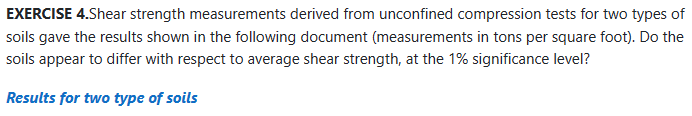

CHECK: statistic: 5.1681473319343345, pvalue= 2.593228732352821e-06

In [31]:
pwd

'C:\\Users\\goodp\\Downloads'

In [33]:
soil0 = pd.read_csv('soil - Sheet1.csv')
soil = soil0.copy()
soil

,Soil1,Soil2
0,1.442,1.364
1,1.943,1.878
2,1.110,1.337
3,1.912,1.828
4,1.553,1.371
5,1.641,1.428
6,1.499,1.119
7,1.347,1.373
8,1.685,1.589
9,1.578,1.714


In [34]:
print(soil.Soil1.mean())
print(soil.Soil2.mean())

1.6918
1.4171142857142855


In [35]:
soil.Soil1.isna().sum()

5

In [36]:
soil.Soil2.isna().sum()

0

In [ ]:
# H0: mu1 = mu2
# H1: mu1 != mu2

In [37]:
# Solution-1: Drop NaN values
stats.levene(soil.dropna()["Soil1"], soil["Soil2"])

LeveneResult(statistic=0.31486292982090475, pvalue=0.5767018253541134)

In [ ]:
# H0 rejected

In [48]:
indTest = stats.ttest_ind(soil.dropna()["Soil1"], soil["Soil2"], equal_var=True)
indTest

Ttest_indResult(statistic=5.58856260809653, pvalue=4.381657766244157e-07)

In [47]:
alpha = 0.01

if indTest.pvalue < alpha:
    print("Reject the null")
else:
    print("Fail to reject the null")

Reject the null


In [41]:
# Solution-2: Fill NaN values with the mean value
soil.Soil1.fillna(soil.Soil1.mean(), inplace=True)

In [42]:
indTest1 = stats.ttest_ind(soil.Soil1, soil.Soil2)
indTest1

Ttest_indResult(statistic=5.58856260809653, pvalue=4.381657766244157e-07)

In [43]:
indTest2 = stats.ttest_ind(soil.Soil1, soil.Soil2, nan_policy="omit")
indTest2

Ttest_indResult(statistic=5.58856260809653, pvalue=4.381657766244157e-07)

In [44]:
if indTest1.pvalue < alpha:
    print("Reject the Null, soil samples differ depending on the average shear strength")
else:
    print("Fail to reject")

Reject the Null, soil samples differ depending on the average shear strength


In [45]:
if indTest2.pvalue < alpha:
    print("Reject the Null, soil samples differ depending on the average shear strength")
else:
    print("Fail to reject")

Reject the Null, soil samples differ depending on the average shear strength


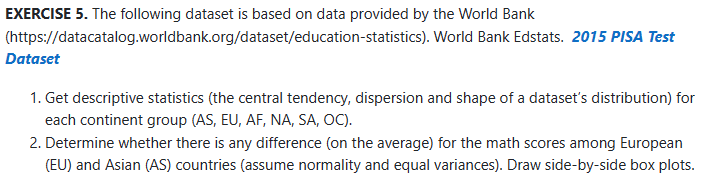

CHECK: statistic=0.870055317967983, pvalue=0.38826888111307345

In [49]:
pisa0 = pd.read_csv("2015 PISA Test - Sheet1.csv")
pisa = pisa0.copy()
pisa

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
0,ALB,EU,63.252933,413.1570,405.2588,427.2250
1,ARE,AS,90.500000,427.4827,433.5423,436.7311
2,ARG,SA,68.043064,409.0333,425.3031,432.2262
3,AUS,OC,84.560519,493.8962,502.9006,509.9939
4,AUT,EU,83.940142,496.7423,484.8656,495.0375
...,...,...,...,...,...,...
65,TUN,AF,48.519836,366.8180,361.0555,386.4034
66,TUR,EU,53.744979,420.4540,428.3351,425.4895
67,URY,SA,64.600000,417.9919,436.5721,435.3630
68,USA,NaN,74.554202,469.6285,496.9351,496.2424


In [50]:
pisa.sample(5)

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
13,CRI,NaN,59.762950,400.2534,427.4875,419.6080
41,LUX,EU,97.334100,485.7706,481.4391,482.8064
22,FIN,EU,86.422133,511.0769,526.4247,530.6612
33,ISR,AS,77.352090,469.6695,478.9606,466.5528
51,NOR,EU,96.810300,501.7298,513.1912,498.4811


In [51]:
pisa.Continent_Code.value_counts()

EU    37
AS    17
SA     7
OC     2
AF     2
Name: Continent_Code, dtype: int64

In [52]:
pisa.describe().T

,count,mean,std,min,25%,50%,75%,max
internet_users_per_100,70.0,71.973099,16.390632,21.976068,60.899020,72.99935,85.026763,98.2000
Math,70.0,460.971557,53.327205,327.702000,417.416075,477.60715,500.482925,564.1897
Reading,70.0,460.997291,49.502679,346.549000,426.948625,480.19985,499.687475,535.1002
Science,70.0,465.439093,48.397254,331.638800,425.923375,475.40005,502.431250,555.5747


In [53]:
pisa_as_eu = pisa.loc[(pisa["Continent_Code"] == "EU") | (pisa["Continent_Code"] == "AS")]

In [54]:
pisa_as_eu.sample(5)

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
43,MAC,AS,77.600132,543.8078,508.6905,528.5496
17,DNK,EU,96.330500,511.0876,499.8146,501.9369
39,LBN,AS,74.000000,396.2497,346.5490,386.4854
11,CHN,AS,50.300000,531.2961,493.9412,517.7793
9,CHE,EU,87.479056,521.2506,492.1982,505.5058


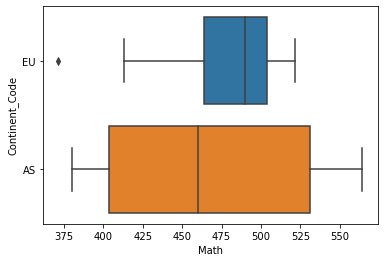

In [55]:
sns.boxplot(x = pisa_as_eu.Math, y = pisa_as_eu.Continent_Code);

In [56]:
pisa_as_eu.groupby("Continent_Code")["Math"].describe()

,count,mean,std,min,25%,50%,75%,max
Continent_Code,,,,,,,,
AS,17.0,466.216647,64.356490,380.2590,403.8332,459.8160,531.2961,564.1897
EU,37.0,477.981449,35.150403,371.3114,464.0401,489.7287,503.7220,521.2506


In [59]:
indTest5 = stats.ttest_ind(pisa_as_eu[pisa_as_eu["Continent_Code"]=="EU"]["Math"], 
                pisa_as_eu[pisa_as_eu["Continent_Code"]=="AS"]["Math"],equal_var = True)
indTest5

Ttest_indResult(statistic=0.870055317967983, pvalue=0.38826888111307345)

In [60]:
alpha = 0.05

if indTest5.pvalue < alpha:
    print("Reject the null")
else:
    print("Fail to reject the null")

Fail to reject the null
